# IIR Delay Effect - Signal Processing 2024/2025

### Author: Pablo Mollá

## Theory

### What is the IIR Filter with Delay Effect?

An $\fbox{IIR (Infinite Impulse Response) filter}$ with a delay effect can be described using the following difference equation:

$$
\textcolor{red}{s}[t] = \textcolor{green}{\alpha} \cdot \textcolor{blue}{e}[t] + \textcolor{purple}{\beta} \cdot \textcolor{red}{s}[t - \textcolor{orange}{D}]
$$

Where:
- $\textcolor{red}{s}[t]$ is the output signal at time $t$,
- $\textcolor{blue}{e}[t]$ is the input signal at time $t$,
- $\textcolor{green}{\alpha}$ is the scaling factor applied to the input signal ($\textcolor{green}{\alpha} > 0 $),
- $\textcolor{purple}{\beta}$ is the attenuation factor applied to the delayed version of the output signal ($ \beta > 0 $),
- $\textcolor{orange}{D}$ is the time delay in samples.

This equation shows that the output at the current time $t$ is a combination of the current input $\textcolor{blue}{e}[t]$, scaled by $\textcolor{green}{\alpha}$, and the previous output delayed by $D$ samples, scaled by $\textcolor{purple}{\beta}$. The presence of feedback ($\textcolor{purple}{\beta} \cdot \textcolor{red}{s}[t - \textcolor{orange}{D}]$) makes this an IIR filter, where the delayed output is fed back into the system, creating a recursive effect.

### Applications of IIR Filter Delay Effect in the Real World

1. $\fbox{Reverberation in Audio Processing}$:
   - In audio production, IIR filters with delay effects are often used to simulate reverb. Reverb is the persistence of sound after the original sound is produced, such as in a large hall where sound waves bounce off the walls. The feedback component ($ \beta s[t - D] $) mimics these reflections by producing delayed and attenuated repetitions of the sound, creating a realistic sense of space.
   - Example: In music studios, IIR delay filters are used in digital reverb effects to give instruments and vocals a sense of depth.

2. $\fbox{Echo Effects in Communication Systems}$:
   - Echoes in voice communications can be generated using IIR delay filters. These filters introduce delayed versions of the speech signal, producing multiple reflections of the voice.
   - Example: In telecommunication systems, IIR filters can be used to simulate or cancel echoes in phone lines or VoIP systems.

3. $\fbox{Room Simulation for Virtual Reality (VR)}$:
   - In virtual reality systems, the perception of realistic environments can be enhanced by simulating room acoustics. IIR delay filters are used to create the delayed and attenuated reflections of sound that happen in real-world environments.
   - Example: In VR games or simulations, the sound of footsteps, voices, or ambient noise can be processed with IIR filters to recreate the feeling of being in large or echo-prone spaces.

4. $\fbox{Feedback Delay in Control Systems}$:
   - IIR filters are used in control systems where feedback delay plays an important role. The delayed feedback helps in modeling systems with time lags or predicting future states in control loops.
   - Example: In industrial automation, feedback delay effects can model processes where there is a delay between input and output actions, such as the movement of robotic arms or temperature control systems with delayed responses.


## 0. Libraries

In [282]:
import os
import glob
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from IPython.display import Audio

## 1. Loading the Data

In [283]:
# Load the wav file (change the file path to your file)
files_path_list = ['Lab_1/data/music.wav', 'Lab_1/data/noise1.wav', 'Lab_1/data/noise2.wav', 'Lab_1/data/noise3.wav','Lab_1/data/string_1.wav', 'Lab_1/data/string_2.wav', 'Lab_1/data/string_3.wav']
loaded_files_list = []

for file_path in files_path_list:
    data, sample_rate = librosa.load(file_path, sr=None)
    file_name = os.path.basename(file_path)
    loaded_files_list.append([data, sample_rate, file_name])

# Example to listen: string_1.wav
file_path = files_path_list[4]
file_name = os.path.basename(file_path)
data, sample_rate = librosa.load(file_path, sr=None)

# Print sample rate and data shape
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data Shape: {data.shape}")

# Play the audio (optional)
Audio(data, rate=sample_rate)

Sample Rate: 44100 Hz
Data Shape: (237568,)


## 2. Parameters for the Delay Effect: Scaling Factor, Attenuation Factor & Delay Time

In [284]:
# Scaling Factor (float, alpha > 0)
alpha = 1.0

# Attenuation Factor (float, beta > 0)
beta = 0.5

# Delay in seconds
D_in_secs = 0.1

# Delay Time in samples
D_in_samples = int(D_in_secs * sample_rate)
print(f"Delay in samples: {D_in_samples}")


Delay in samples: 4410


## 3. Application of IIR delayed signal in the time domain

In [285]:
# Define the IIR delay effect function
def iir_delay_effect(data, alpha, beta, D_in_samples):
    """
    Applies the IIR delay effect to the input signal.
    
    Parameters:
    - e: Input signal (numpy array)
    - alpha: Scaling factor (float, alpha > 0)
    - beta: Attenuation factor (float, beta > 0)
    - D: Delay in samples (integer, D >= 1)

    Returns:
    - delayed_signal: Output signal after applying the delay effect (numpy array)
    """
    # Initialize the output signal
    delayed_signal = np.zeros(len(data))
    for t in range(len(data)):
        if t >= D_in_samples:
            delayed_signal[t] = alpha * data[t] + beta * delayed_signal[t - D_in_samples]
        else:
            delayed_signal[t] = alpha * data[t]
    return delayed_signal

# Apply the IIR delay effect
delayed_signal = iir_delay_effect(data, alpha, beta, D_in_samples)

In [286]:
# Listen to the original and delayed audio
print("Original Audio:")
Audio(data, rate=sample_rate)

Original Audio:


In [287]:
# Apply the delay effect
delayed_data = iir_delay_effect(data, alpha, beta, D_in_samples)

print("Delayed Audio:")
Audio(delayed_data, rate=sample_rate)

# Save delayed audio to file (optional)
#sf.write('delayed_iir_audio.wav', delayed_data, sample_rate)

Delayed Audio:


## 4. Plotting Original and Delayed signals

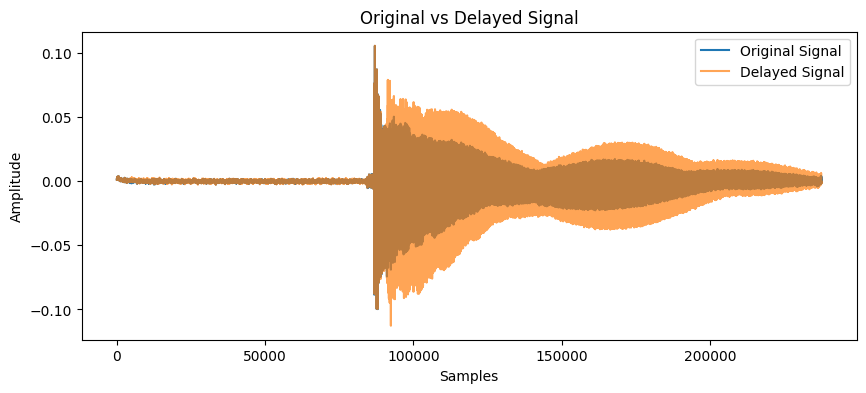

In [288]:
# Plot original and delayed signals
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original Signal')
plt.plot(delayed_data, label='Delayed Signal', alpha=0.7)
plt.title("Original vs Delayed Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

## 5. Computing the Impulse Response of the filter

In [315]:
# Function to compute the impulse response
def compute_impulse_response(alpha, beta, D_in_samples, impulse_length=1000):
    impulse = np.zeros(impulse_length)
    impulse[0] = 1  # impulse at t=0
    impulse_response = np.zeros(impulse_length)
    # IIR delay effect on the impulse signal
    for t in range(impulse_length):
        impulse_response[t] = alpha * impulse[t]
        if t - D_in_samples >= 0:
            impulse_response[t] += beta * impulse_response[t - D_in_samples]
    return impulse_response

# Let's make smaller D_in_samples to ease visualization
D_in_samples = 100

# Compute the impulse response of the filter
impulse_response = compute_impulse_response(alpha, beta, D_in_samples)

### 5.1. Plotting the Impulse Response

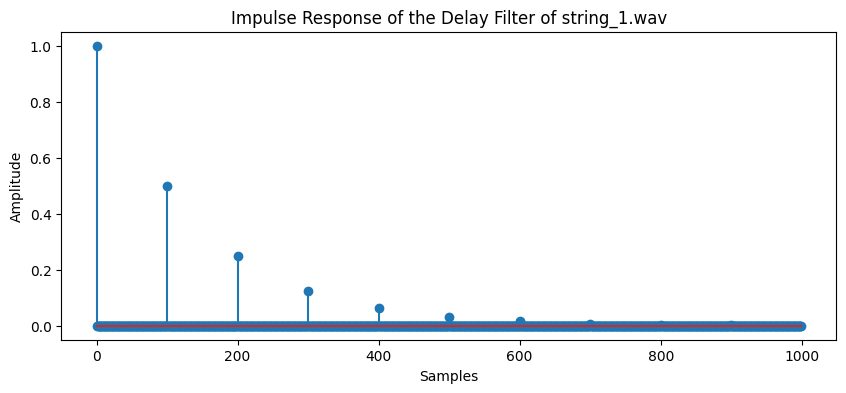

In [316]:
# Plot the impulse response
plt.figure(figsize=(10, 4))
plt.stem(impulse_response)
plt.title(f"Impulse Response of the Delay Filter of {file_name}")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

This plot illustrates the impulse response of an IIR delay filter. The initial peak at $t = 0$ indicates the immediate reaction to the impulse, with an amplitude of $1$. Following this, smaller peaks appear every $4410$ samples, corresponding to the delay imposed by the filter. Each subsequent delayed peak diminishes in size due to an attenuation factor of $0.5$. The response gradually decreases, but the pattern continues with smaller amplitudes, which is characteristic of IIR filters owing to their feedback structure.

## 6. Computing the Frequency Response of the filter

### 6.1. Frequency Response from Impulse Response

In [317]:
# Function to compute the frequency response
def compute_frequency_response(impulse_response, sample_rate):
    # Compute FFT of the impulse response
    N = len(impulse_response)
    freq_response = fft(impulse_response)
    freqs = fftfreq(N, 1 / sample_rate)
    
    # Return only positive frequencies
    positive_freqs = freqs[:N//2]
    magnitude_response = np.abs(freq_response[:N//2])
    phase_response = np.angle(freq_response[:N//2])
    
    return positive_freqs, magnitude_response, phase_response

# Compute the frequency response of the filter
positive_freqs, magnitude_response, phase_response = compute_frequency_response(impulse_response, sample_rate)

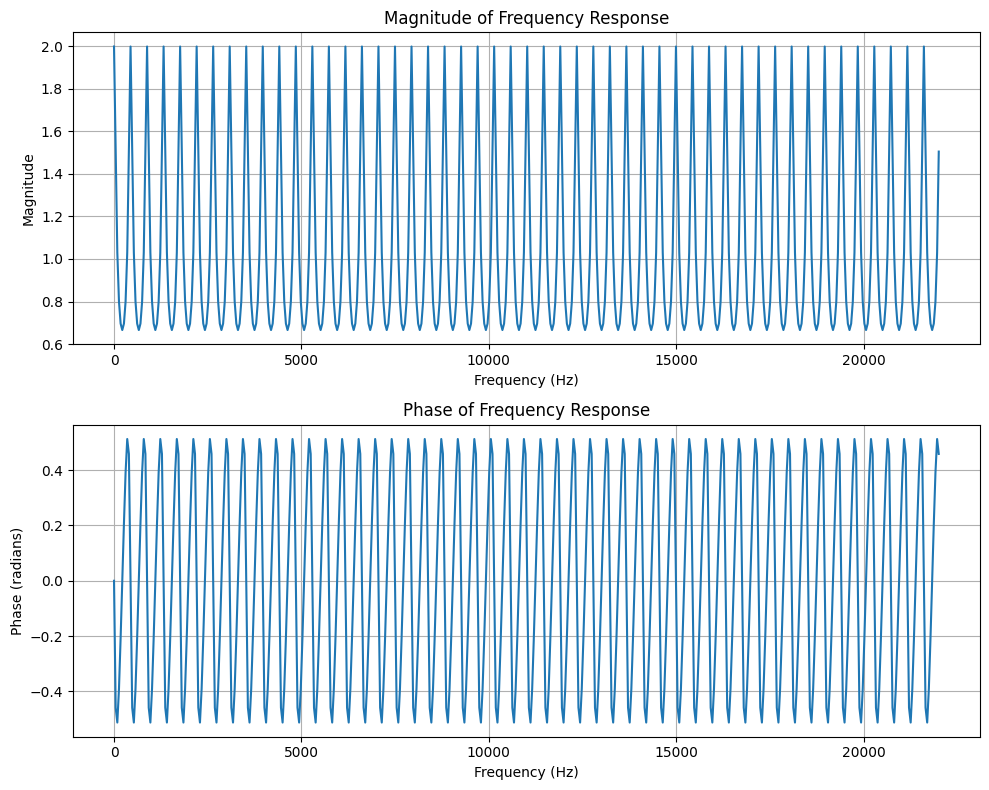

In [318]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(positive_freqs, magnitude_response)
plt.title('Magnitude of Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, phase_response)
plt.title('Phase of Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

## 7. Is this implementation always stable?

- The stability of an IIR filter is not guaranteed and depends on certain settings. For the filter to be stable, some mathematical conditions need to be satisfied. If the scaling or attenuation factors (which control the volume and strength of the delayed signal) are set too high, the filter can become unstable, meaning it could produce unpredictable or unbounded outputs.

- In general, IIR filters can be designed to be stable, but they require careful selection of coefficients. If the scaling or attenuation factors are too high, they can lead to instability. Therefore, stability is not guaranteed in all implementations; it must be explicitly verified for the given parameters.

## 8. Discuss the parameters

- $\fbox{Scaling Factor}$: This adjusts the overall strength of the output. If it's set too high, it can make the filter amplify the signal too much, risking instability.

- $\fbox{Attenuation Factor}$: This reduces the strength of the delayed signal. If it's close to 1, the delayed signal is almost as strong as the original. Lower values (like 0.5) reduce the delayed signal more. This helps control the filter’s stability.

- $\fbox{Delay in Samples}$: This defines how long the delay is before the repeated signal appears. It doesn't directly affect stability but changes the timing of the delay. Large delays can cause other issues like unwanted sound effects.


## 9. Comparison with the FIR

1. Stability:

- $\textcolor{red}{\text{FIR Filters}}$: Always stable as they have no feedback; their impulse response is finite, ensuring that the output remains bounded for any bounded input.

- $\textcolor{blue}{\text{IIR Filters}}$: Stability is conditional and depends on the pole placement. If poles are outside the unit circle, the filter can become unstable.

2. Impulse Response:

- $\textcolor{red}{\text{IR Filters}}$: Have a finite impulse response defined directly by the coefficients. The response to an impulse is simply the filter's coefficients.

- $\textcolor{blue}{\text{IIR Filters}}$: Have an infinite impulse response, which means they can theoretically continue to respond indefinitely due to feedback. This makes the response more complex.

3. Frequency Response:

- $\textcolor{red}{\text{FIR Filters}}$: Typically, the frequency response is easier to design since they can be made linear phase, which preserves the waveform shape of signals.

- $\textcolor{blue}{\text{IIR Filters}}$: Generally require fewer coefficients to achieve a desired frequency response, making them more efficient in terms of computation. However, they are more complex and can introduce phase distortion.